In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import math
import time
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import linear_model
from prophet import Prophet
from prophet.diagnostics import performance_metrics
from prophet.diagnostics import cross_validation
import datetime
import operator
%matplotlib inline

In [23]:
# Project Topic/Title: Predicting Covid-19 cases for healthcare systems globally.

# Problem Statement: Covid-19 is a global pandemic that has caused great stress and 
#                    impacted the world in various ways. Most notably, it has placed 
#                    great stress on the healthcare systems worldwide.

# Motivation: There is a need to predict cases as accurately as possible 
#             so that the healthcare systems can better accommodate the 
#             necessary resources for treatment, enabling them to better cope.


In [24]:
confirmed_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
death_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recovered_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [25]:
confirmed_cases.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/8/21,9/9/21,9/10/21,9/11/21,9/12/21,9/13/21,9/14/21,9/15/21,9/16/21,9/17/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,153736,153840,153962,153982,153990,154094,154180,154283,154361,154487
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,153318,154316,155293,156162,157026,157436,158431,159423,160365,161324
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,198962,199275,199560,199822,200068,200301,200528,200770,200989,201224
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,15070,15078,15083,15083,15083,15096,15099,15108,15113,15124
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,49349,49628,49943,50348,50446,50738,51047,51407,51827,52208


In [26]:
death_cases.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/8/21,9/9/21,9/10/21,9/11/21,9/12/21,9/13/21,9/14/21,9/15/21,9/16/21,9/17/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7151,7157,7164,7167,7167,7169,7171,7174,7183,7186
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,2528,2531,2535,2539,2543,2548,2553,2557,2563,2569
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,5489,5519,5539,5558,5578,5596,5614,5630,5651,5670
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,130,130,130,130,130,130,130,130,130,130
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1309,1313,1322,1327,1339,1345,1358,1360,1371,1378


In [27]:
recovered_cases.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/8/21,9/9/21,9/10/21,9/11/21,9/12/21,9/13/21,9/14/21,9/15/21,9/16/21,9/17/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
cols = confirmed_cases.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '9/8/21', '9/9/21', '9/10/21', '9/11/21', '9/12/21', '9/13/21',
       '9/14/21', '9/15/21', '9/16/21', '9/17/21'],
      dtype='object', length=609)

In [29]:
confirmed_filtered = confirmed_cases.loc[:, cols[4]:cols[-1]]
confirmed_filtered.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,9/8/21,9/9/21,9/10/21,9/11/21,9/12/21,9/13/21,9/14/21,9/15/21,9/16/21,9/17/21
0,0,0,0,0,0,0,0,0,0,0,...,153736,153840,153962,153982,153990,154094,154180,154283,154361,154487
1,0,0,0,0,0,0,0,0,0,0,...,153318,154316,155293,156162,157026,157436,158431,159423,160365,161324
2,0,0,0,0,0,0,0,0,0,0,...,198962,199275,199560,199822,200068,200301,200528,200770,200989,201224
3,0,0,0,0,0,0,0,0,0,0,...,15070,15078,15083,15083,15083,15096,15099,15108,15113,15124
4,0,0,0,0,0,0,0,0,0,0,...,49349,49628,49943,50348,50446,50738,51047,51407,51827,52208


In [30]:
singapore_confirmed_filtered = confirmed_cases[confirmed_cases["Country/Region"] == "Singapore"].loc[:, cols[4]:cols[-1]]
singapore_confirmed_filtered

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,9/8/21,9/9/21,9/10/21,9/11/21,9/12/21,9/13/21,9/14/21,9/15/21,9/16/21,9/17/21
230,0,1,3,3,4,5,7,7,10,13,...,69582,70039,70612,71167,71687,72294,73131,73938,74848,75783


In [31]:
deaths_filtered = death_cases.loc[:, cols[4]:cols[-1]]
deaths_filtered.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,9/8/21,9/9/21,9/10/21,9/11/21,9/12/21,9/13/21,9/14/21,9/15/21,9/16/21,9/17/21
0,0,0,0,0,0,0,0,0,0,0,...,7151,7157,7164,7167,7167,7169,7171,7174,7183,7186
1,0,0,0,0,0,0,0,0,0,0,...,2528,2531,2535,2539,2543,2548,2553,2557,2563,2569
2,0,0,0,0,0,0,0,0,0,0,...,5489,5519,5539,5558,5578,5596,5614,5630,5651,5670
3,0,0,0,0,0,0,0,0,0,0,...,130,130,130,130,130,130,130,130,130,130
4,0,0,0,0,0,0,0,0,0,0,...,1309,1313,1322,1327,1339,1345,1358,1360,1371,1378


In [32]:
recovered_filtered = recovered_cases.loc[:, cols[4]:cols[-1]]
recovered_filtered.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,9/8/21,9/9/21,9/10/21,9/11/21,9/12/21,9/13/21,9/14/21,9/15/21,9/16/21,9/17/21
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:

dates = confirmed_filtered.keys()
world_cases = []
singapore_cases = []
total_deaths = [] 
mortality_rate = []
total_recovered = [] 

for i in dates:
    confirmed_sum = confirmed_filtered[i].sum()
    singapore_confirmed_sum = singapore_confirmed_filtered[i].sum()
    death_sum = deaths_filtered[i].sum()
    recovered_sum = recovered_filtered[i].sum()
    world_cases.append(confirmed_sum)
    singapore_cases.append(singapore_confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    total_recovered.append(recovered_sum)

In [34]:
confirmed_sum, death_sum, recovered_sum, world_cases, singapore_cases

(227649349,
 4679137,
 0,
 [557,
  655,
  941,
  1433,
  2118,
  2927,
  5578,
  6167,
  8235,
  9927,
  12038,
  16787,
  19887,
  23898,
  27643,
  30803,
  34396,
  37130,
  40160,
  42769,
  44811,
  45229,
  60382,
  66909,
  69052,
  71235,
  73270,
  75152,
  75652,
  76212,
  76841,
  78602,
  78982,
  79550,
  80404,
  81381,
  82740,
  84126,
  86018,
  88400,
  90379,
  92980,
  95282,
  98095,
  102016,
  106113,
  110051,
  114232,
  119056,
  126719,
  132507,
  146879,
  157983,
  169249,
  184042,
  200033,
  219607,
  246706,
  277580,
  309731,
  344829,
  387512,
  428581,
  479654,
  542593,
  607576,
  677332,
  734030,
  799349,
  876287,
  959294,
  1042432,
  1126245,
  1185380,
  1256206,
  1330154,
  1399798,
  1483095,
  1570086,
  1655401,
  1729777,
  1849402,
  1920435,
  2004305,
  2082514,
  2178207,
  2266243,
  2343442,
  2420188,
  2495745,
  2571756,
  2653241,
  2737238,
  2821356,
  2903704,
  2975173,
  3045420,
  3121234,
  3198423,
  3281710,
  

In [35]:

days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
singapore_cases = np.array(singapore_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)

days_since_1_22

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [36]:
world_cases

array([[      557],
       [      655],
       [      941],
       [     1433],
       [     2118],
       [     2927],
       [     5578],
       [     6167],
       [     8235],
       [     9927],
       [    12038],
       [    16787],
       [    19887],
       [    23898],
       [    27643],
       [    30803],
       [    34396],
       [    37130],
       [    40160],
       [    42769],
       [    44811],
       [    45229],
       [    60382],
       [    66909],
       [    69052],
       [    71235],
       [    73270],
       [    75152],
       [    75652],
       [    76212],
       [    76841],
       [    78602],
       [    78982],
       [    79550],
       [    80404],
       [    81381],
       [    82740],
       [    84126],
       [    86018],
       [    88400],
       [    90379],
       [    92980],
       [    95282],
       [    98095],
       [   102016],
       [   106113],
       [   110051],
       [   114232],
       [   119056],
       [   126719],


In [37]:
days_in_future = 10
future_forecast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forecast[:-10]

future_forecast

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [38]:
# Convert all the integers into datetime for better visualization

start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forecast_dates = []
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [39]:
latest_confirmed = confirmed_filtered[dates[-1]]
latest_deaths = deaths_filtered[dates[-1]]
latest_recoveries = recovered_filtered[dates[-1]]

latest_confirmed, latest_deaths, latest_recoveries

(0      154487
 1      161324
 2      201224
 3       15124
 4       52208
         ...  
 274    667650
 275    381854
 276      8593
 277    208353
 278    127632
 Name: 9/17/21, Length: 279, dtype: int64,
 0       7186
 1       2569
 2       5670
 3        130
 4       1378
        ...  
 274    16637
 275     3890
 276     1628
 277     3637
 278     4562
 Name: 9/17/21, Length: 279, dtype: int64,
 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 259    0
 260    0
 261    0
 262    0
 263    0
 Name: 9/17/21, Length: 264, dtype: int64)

In [40]:
unique_countries = list(confirmed_cases['Country/Region'].unique())
unique_countries

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Diamond Princess',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',

In [41]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forecast_dates = []
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [42]:
#print(days_since_1_22)

# print(future_forecast_dates)
# print(dates)

new_future_dates = []
start_of_new_future_dates = (datetime.datetime.strptime(dates[-1], '%m/%d/%y') + datetime.timedelta(days=1)).strftime('%m-%d-%y')
days_to_add = 10
for i in range(days_to_add):
    new_future_dates.append((datetime.datetime.strptime(start_of_new_future_dates, '%m-%d-%y') + datetime.timedelta(days=i)).strftime('%m-%d-%y'))

new_future_dates

['09-18-21',
 '09-19-21',
 '09-20-21',
 '09-21-21',
 '09-22-21',
 '09-23-21',
 '09-24-21',
 '09-25-21',
 '09-26-21',
 '09-27-21']

**Singapore Cases**

In [43]:
df = pd.DataFrame(columns=['ds','y'])
df['y'] = [x[0] for x in singapore_cases]
dates = [date.replace('/','-') for date in dates]
df['ds'] = dates
df['ds'] = pd.to_datetime(df['ds'])

df

,ds,y
0,2020-01-22,0
1,2020-01-23,1
2,2020-01-24,3
3,2020-01-25,3
4,2020-01-26,4
...,...,...
600,2021-09-13,72294
601,2021-09-14,73131
602,2021-09-15,73938
603,2021-09-16,74848


**Prophet model - Singapore Cases**

In [44]:
model = Prophet()
model.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [45]:
future = pd.DataFrame(columns=['ds'])
#future['ds'] = new_future_dates
my_future_forecast_dates = [date.replace('/','-') for date in future_forecast_dates]
future['ds'] = my_future_forecast_dates

future

,ds
0,01-22-2020
1,01-23-2020
2,01-24-2020
3,01-25-2020
4,01-26-2020
...,...
610,09-23-2021
611,09-24-2021
612,09-25-2021
613,09-26-2021


          ds        yhat   yhat_lower  yhat_upper
0 2020-01-22 -205.310813 -1130.412443  742.781024
1 2020-01-23 -182.998562 -1114.240957  747.704372
2 2020-01-24 -154.870228 -1181.116300  770.415822
3 2020-01-25 -219.868300 -1141.570573  718.620945
4 2020-01-26 -201.418894 -1114.899598  708.628364


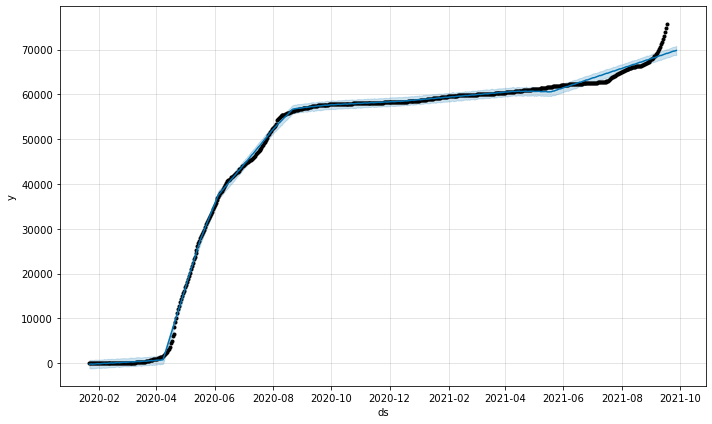

In [46]:
forecast = model.predict(future)

print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
model.plot(forecast)
plt.show()

In [47]:
#https://facebook.github.io/prophet/docs/diagnostics.html
df_cv = cross_validation(model, horizon='60 days', initial='365 days', period='30 days')

df_cv

INFO:prophet:Making 6 forecasts with cutoffs between 2021-02-19 00:00:00 and 2021-07-19 00:00:00
100%|██████████| 6/6 [00:29<00:00,  4.88s/it]


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2021-02-20,59887.970561,59606.551021,60151.771514,59858,2021-02-19
1,2021-02-21,59916.882567,59629.328049,60195.468956,59869,2021-02-19
2,2021-02-22,59927.403570,59622.840873,60215.305211,59879,2021-02-19
3,2021-02-23,59938.460284,59643.676047,60214.088052,59883,2021-02-19
4,2021-02-24,59974.173534,59663.163343,60283.353502,59890,2021-02-19
...,...,...,...,...,...,...
355,2021-09-13,64431.621456,57604.465587,70938.169751,72294,2021-07-19
356,2021-09-14,64442.775813,57383.268837,71022.021939,73131,2021-07-19
357,2021-09-15,64482.938337,57203.763657,71271.670181,73938,2021-07-19
358,2021-09-16,64508.415839,57053.199246,71400.048657,74848,2021-07-19


In [48]:
df_diagnostics = performance_metrics(df_cv)
df_diagnostics

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,6 days,1.071924e+05,327.402456,233.574824,0.003742,0.003030,0.003753,0.805556
1,7 days,1.379070e+05,371.358333,261.925550,0.004188,0.003051,0.004202,0.805556
2,8 days,1.731011e+05,416.054148,289.144521,0.004613,0.003184,0.004632,0.805556
3,9 days,2.106498e+05,458.966005,315.745105,0.005028,0.003281,0.005051,0.833333
4,10 days,2.517430e+05,501.739969,340.814496,0.005417,0.003256,0.005445,0.833333
5,11 days,2.964495e+05,544.471738,364.746215,0.005785,0.003337,0.005818,0.833333
6,12 days,3.450536e+05,587.412624,388.464745,0.006149,0.003429,0.006187,0.833333
7,13 days,3.954910e+05,628.880736,410.922925,0.006491,0.003429,0.006535,0.833333
8,14 days,4.483717e+05,669.605625,434.718096,0.006855,0.003562,0.006905,0.833333
9,15 days,5.031773e+05,709.349905,456.853733,0.007191,0.003562,0.007248,0.833333


**World Cases**

In [49]:
df = pd.DataFrame(columns=['ds','y'])
df['y'] = [x[0] for x in world_cases]
dates = [date.replace('/','-') for date in dates]
df['ds'] = dates
df['ds'] = pd.to_datetime(df['ds'])

df

,ds,y
0,2020-01-22,557
1,2020-01-23,655
2,2020-01-24,941
3,2020-01-25,1433
4,2020-01-26,2118
...,...,...
600,2021-09-13,225366201
601,2021-09-14,225915368
602,2021-09-15,226478640
603,2021-09-16,227056250


**Prophet Model - World Cases**

In [50]:
model = Prophet()
model.fit(df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [51]:
future = pd.DataFrame(columns=['ds'])
#future['ds'] = new_future_dates
my_future_forecast_dates = [date.replace('/','-') for date in future_forecast_dates]
future['ds'] = my_future_forecast_dates

future

,ds
0,01-22-2020
1,01-23-2020
2,01-24-2020
3,01-25-2020
4,01-26-2020
...,...
610,09-23-2021
611,09-24-2021
612,09-25-2021
613,09-26-2021


          ds           yhat    yhat_lower    yhat_upper
0 2020-01-22 -117448.272668 -1.361552e+06  1.149735e+06
1 2020-01-23  -60349.749790 -1.280350e+06  1.136788e+06
2 2020-01-24   -7277.797946 -1.181002e+06  1.182078e+06
3 2020-01-25  -42248.186157 -1.199950e+06  1.187502e+06
4 2020-01-26  -96428.624164 -1.301895e+06  1.167177e+06


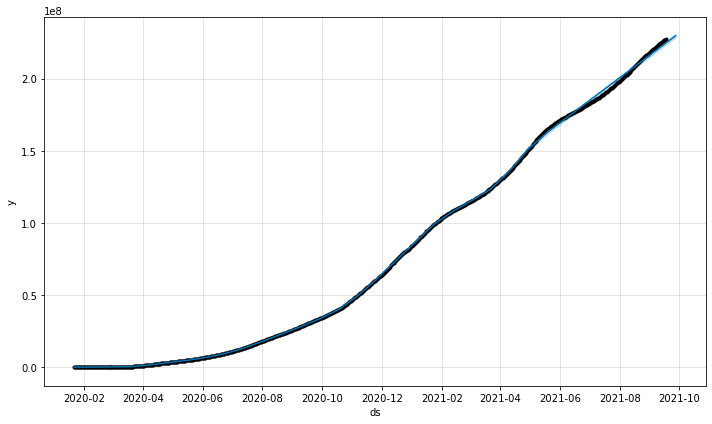

In [52]:
forecast = model.predict(future)

print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
model.plot(forecast)
plt.show()

In [53]:
#https://facebook.github.io/prophet/docs/diagnostics.html
df_cv = cross_validation(model, horizon='60 days', initial='365 days', period='30 days')

df_cv

INFO:prophet:Making 6 forecasts with cutoffs between 2021-02-19 00:00:00 and 2021-07-19 00:00:00
100%|██████████| 6/6 [00:21<00:00,  3.62s/it]


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2021-02-20,1.145733e+08,1.139195e+08,1.151547e+08,111210516,2021-02-19
1,2021-02-21,1.151306e+08,1.145388e+08,1.157714e+08,111525811,2021-02-19
2,2021-02-22,1.156942e+08,1.150308e+08,1.162872e+08,111813006,2021-02-19
3,2021-02-23,1.162944e+08,1.156987e+08,1.169241e+08,112201598,2021-02-19
4,2021-02-24,1.169175e+08,1.163008e+08,1.175450e+08,112646807,2021-02-19
...,...,...,...,...,...,...
355,2021-09-13,2.272037e+08,2.226609e+08,2.318606e+08,225366201,2021-07-19
356,2021-09-14,2.278201e+08,2.232407e+08,2.327303e+08,225915368,2021-07-19
357,2021-09-15,2.284149e+08,2.235125e+08,2.333740e+08,226478640,2021-07-19
358,2021-09-16,2.290220e+08,2.236605e+08,2.342418e+08,227056250,2021-07-19


In [54]:
df_diagnostics = performance_metrics(df_cv)
df_diagnostics

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,6 days,1.699801e+13,4.122865e+06,3.921177e+06,0.025758,0.023874,0.025674,0.000000
1,7 days,1.825959e+13,4.273125e+06,4.035446e+06,0.026450,0.024670,0.026363,0.000000
2,8 days,1.964620e+13,4.432403e+06,4.152619e+06,0.027159,0.025375,0.027068,0.000000
3,9 days,2.108251e+13,4.591570e+06,4.265616e+06,0.027840,0.025973,0.027745,0.000000
4,10 days,2.263298e+13,4.757413e+06,4.379539e+06,0.028522,0.026708,0.028423,0.000000
5,11 days,2.423504e+13,4.922910e+06,4.486609e+06,0.029172,0.027355,0.029067,0.027778
6,12 days,2.588610e+13,5.087838e+06,4.590033e+06,0.029794,0.027958,0.029683,0.055556
7,13 days,2.755999e+13,5.249761e+06,4.688860e+06,0.030382,0.028824,0.030265,0.083333
8,14 days,2.918034e+13,5.401883e+06,4.771997e+06,0.030859,0.029338,0.030735,0.111111
9,15 days,3.092893e+13,5.561378e+06,4.858636e+06,0.031353,0.029847,0.031223,0.138889


In [57]:
df_diagnostics.mean()

horizon          33 days 00:00:00
mse         55833919495313.851562
rmse               7325923.097673
mae                6422782.093437
mape                     0.039445
mdape                    0.042234
smape                    0.039335
coverage                 0.180303
dtype: object

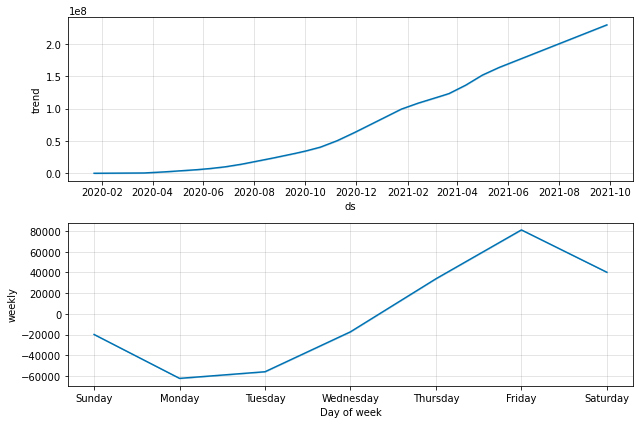

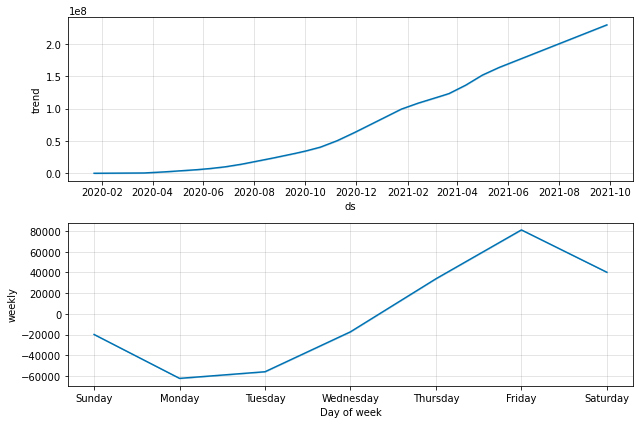

In [58]:
model.plot_components(forecast)

In [59]:
metric_df = forecast.set_index('ds')[['yhat']].join(df.set_index('ds').y).reset_index()
metric_df.dropna(inplace=True)
r2_score(metric_df.y, metric_df.yhat)

0.9998301847356771